In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Population Distribution and Parameter

In [2]:
files = ['num.csv', 'percent.csv', 'sub-qhp-num.csv', 'sub-qhp-per.csv', 'qhp400-num.csv', 'qhp400-per.csv', 'income-num.csv', 'income-per.csv']
tables = []
for file_name in files:
    file_path = 'csvFiles/' + file_name
    tables.append(Table.read_table(file_path))
for index in range(len(tables)-1):
    tbl = tables[index]
    column_nums = tbl.num_columns
    tables[index] = tbl.drop(np.arange(column_nums-10, column_nums, 1)).drop('FIPS Code')
tables[0]

C:\Users\PeterWi.UNC-R90YENLK\anaconda3\lib\site-packages\datascience\tables.py:1252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if i not in exclude and c not in exclude])


State Name,County Name,Total Non-Elderly Population (Excluding Undocumented),Uninsured Population (Excluding Undocumented),Percent Uninsured,HIU Income < 100% FPL,HIU Income 100-138% FPL,HIU Income 139-249% FPL,HIU Income 250-400% FPL,HIU Income 400% FPL,Age 0-18,Age 19-34,Age 35-49,Age 50-64,Male,Female,Married,Child in Family,Spanish/Hispanic/Latino Origin,White Non-Latino,Black Non-Latino,Asian / Native-Hawaiian / Pac Islander,American Indian / Alaska Native,Multi-racial or Other,SNAP Recipient,With a disability,Full-time Worker in Family,Employed in Agriculture Industry,Employed in Mining/Construction Industry,Employed in Manufacturing Industry,Employed in Trade Industry,Employed in Info/Finance Industry,Employed in Education/Health Industry,Employed in Entertainment Industry,Employed in Service Industry,Employed in Military/Public Industry,Less than High School,High School Diploma
Alabama,Autauga AL,"46,000","4,300",9%,"2,300",700,600,500,300,200,"1,600","1,500","1,100","2,800","1,600","1,300","1,200",200,"2,500","1,600",**,**,0,700,900,"2,600",**,300,400,600,300,300,500,100,100,"1,000","3,000"
Alabama,Baldwin AL,"171,200","15,600",9%,"7,000","1,800","2,400","2,200","2,100","1,000","6,100","4,000","4,500","7,300","8,300","3,900","3,700","1,100","12,700","1,600",**,**,**,"3,500",800,"12,000",300,"2,500",700,"3,400","2,200","1,600","1,500",**,**,"2,500","10,600"
Alabama,Barbour AL,"22,100","2,700",12%,"1,200",300,500,600,100,100,"1,300",800,400,"1,300","1,400",400,"1,000",300,900,"1,500",**,**,**,800,100,"2,100",100,200,200,300,300,300,500,200,**,500,"2,000"
Alabama,Bibb AL,"16,800","2,700",16%,"1,400",400,300,300,300,100,"1,500",700,400,"1,300","1,400",700,900,0,"1,000","1,700",**,**,**,"1,000",300,"1,700",**,100,300,300,200,200,600,200,100,500,"2,000"
Alabama,Blount AL,"49,500","6,400",13%,"3,500",600,700,900,600,500,"2,600","2,300","1,000","3,800","2,600","1,500","1,700",800,"4,300","1,100",**,**,**,"2,000",900,"3,700",**,"1,000",600,600,400,700,200,400,200,"1,600","4,500"
Alabama,Bullock AL,"8,800","1,100",12%,500,100,200,200,0,0,500,300,200,500,600,200,400,100,400,600,**,**,**,300,0,800,0,100,100,100,100,100,200,100,**,200,800
Alabama,Butler AL,"16,600","2,400",14%,"1,100",200,700,200,200,200,"1,100",500,600,"1,200","1,200",400,700,100,"1,500",800,**,**,**,800,300,"1,700",0,200,300,300,300,100,300,100,0,600,"1,800"
Alabama,Calhoun AL,"91,900","11,300",12%,"5,700","1,800","2,300","1,100",500,200,"4,100","4,300","2,700","6,700","4,700","3,600","3,500",300,"6,700","3,500",**,**,**,"3,700","2,000","8,600",**,"1,200","1,800","2,400","1,000",600,"1,300",300,**,"2,500","8,200"
Alabama,Chambers AL,"26,200","3,200",12%,"1,300",100,700,500,600,100,"1,400",800,900,"2,000","1,200","1,200",600,200,"2,100",900,**,**,**,800,600,"2,200",100,300,800,500,300,200,200,100,100,800,"2,400"
Alabama,Cherokee AL,"20,600","3,100",15%,"1,800",100,600,200,300,200,"1,200","1,000",700,"1,900","1,200",600,800,100,"2,000",900,**,**,0,700,700,"2,200",**,400,400,600,300,300,400,0,200,800,"2,200"


In [3]:
def str_to_int(str) :
    if (str == "**"):
        return 0
    if "%" in str :
        return remove_percent(str)
    return int(str.replace(',', ''))

def remove_percent(str) :
    return int(str.replace('%', ''))

In [4]:
column_names = tables[0].labels # we get column
unpop = tables[0]
for col in column_names:
    if (col == "State Name") or (col == "County Name"):
        continue
    unpop = unpop.with_columns(
    col, tables[0].apply(str_to_int, col),
)
unpop

State Name,County Name,Total Non-Elderly Population (Excluding Undocumented),Uninsured Population (Excluding Undocumented),Percent Uninsured,HIU Income < 100% FPL,HIU Income 100-138% FPL,HIU Income 139-249% FPL,HIU Income 250-400% FPL,HIU Income 400% FPL,Age 0-18,Age 19-34,Age 35-49,Age 50-64,Male,Female,Married,Child in Family,Spanish/Hispanic/Latino Origin,White Non-Latino,Black Non-Latino,Asian / Native-Hawaiian / Pac Islander,American Indian / Alaska Native,Multi-racial or Other,SNAP Recipient,With a disability,Full-time Worker in Family,Employed in Agriculture Industry,Employed in Mining/Construction Industry,Employed in Manufacturing Industry,Employed in Trade Industry,Employed in Info/Finance Industry,Employed in Education/Health Industry,Employed in Entertainment Industry,Employed in Service Industry,Employed in Military/Public Industry,Less than High School,High School Diploma
Alabama,Autauga AL,46000,4300,9,2300,700,600,500,300,200,1600,1500,1100,2800,1600,1300,1200,200,2500,1600,0,0,0,700,900,2600,0,300,400,600,300,300,500,100,100,1000,3000
Alabama,Baldwin AL,171200,15600,9,7000,1800,2400,2200,2100,1000,6100,4000,4500,7300,8300,3900,3700,1100,12700,1600,0,0,0,3500,800,12000,300,2500,700,3400,2200,1600,1500,0,0,2500,10600
Alabama,Barbour AL,22100,2700,12,1200,300,500,600,100,100,1300,800,400,1300,1400,400,1000,300,900,1500,0,0,0,800,100,2100,100,200,200,300,300,300,500,200,0,500,2000
Alabama,Bibb AL,16800,2700,16,1400,400,300,300,300,100,1500,700,400,1300,1400,700,900,0,1000,1700,0,0,0,1000,300,1700,0,100,300,300,200,200,600,200,100,500,2000
Alabama,Blount AL,49500,6400,13,3500,600,700,900,600,500,2600,2300,1000,3800,2600,1500,1700,800,4300,1100,0,0,0,2000,900,3700,0,1000,600,600,400,700,200,400,200,1600,4500
Alabama,Bullock AL,8800,1100,12,500,100,200,200,0,0,500,300,200,500,600,200,400,100,400,600,0,0,0,300,0,800,0,100,100,100,100,100,200,100,0,200,800
Alabama,Butler AL,16600,2400,14,1100,200,700,200,200,200,1100,500,600,1200,1200,400,700,100,1500,800,0,0,0,800,300,1700,0,200,300,300,300,100,300,100,0,600,1800
Alabama,Calhoun AL,91900,11300,12,5700,1800,2300,1100,500,200,4100,4300,2700,6700,4700,3600,3500,300,6700,3500,0,0,0,3700,2000,8600,0,1200,1800,2400,1000,600,1300,300,0,2500,8200
Alabama,Chambers AL,26200,3200,12,1300,100,700,500,600,100,1400,800,900,2000,1200,1200,600,200,2100,900,0,0,0,800,600,2200,100,300,800,500,300,200,200,100,100,800,2400
Alabama,Cherokee AL,20600,3100,15,1800,100,600,200,300,200,1200,1000,700,1900,1200,600,800,100,2000,900,0,0,0,700,700,2200,0,400,400,600,300,300,400,0,200,800,2200


In [5]:
unpop

State Name,County Name,Total Non-Elderly Population (Excluding Undocumented),Uninsured Population (Excluding Undocumented),Percent Uninsured,HIU Income < 100% FPL,HIU Income 100-138% FPL,HIU Income 139-249% FPL,HIU Income 250-400% FPL,HIU Income 400% FPL,Age 0-18,Age 19-34,Age 35-49,Age 50-64,Male,Female,Married,Child in Family,Spanish/Hispanic/Latino Origin,White Non-Latino,Black Non-Latino,Asian / Native-Hawaiian / Pac Islander,American Indian / Alaska Native,Multi-racial or Other,SNAP Recipient,With a disability,Full-time Worker in Family,Employed in Agriculture Industry,Employed in Mining/Construction Industry,Employed in Manufacturing Industry,Employed in Trade Industry,Employed in Info/Finance Industry,Employed in Education/Health Industry,Employed in Entertainment Industry,Employed in Service Industry,Employed in Military/Public Industry,Less than High School,High School Diploma
Alabama,Autauga AL,46000,4300,9,2300,700,600,500,300,200,1600,1500,1100,2800,1600,1300,1200,200,2500,1600,0,0,0,700,900,2600,0,300,400,600,300,300,500,100,100,1000,3000
Alabama,Baldwin AL,171200,15600,9,7000,1800,2400,2200,2100,1000,6100,4000,4500,7300,8300,3900,3700,1100,12700,1600,0,0,0,3500,800,12000,300,2500,700,3400,2200,1600,1500,0,0,2500,10600
Alabama,Barbour AL,22100,2700,12,1200,300,500,600,100,100,1300,800,400,1300,1400,400,1000,300,900,1500,0,0,0,800,100,2100,100,200,200,300,300,300,500,200,0,500,2000
Alabama,Bibb AL,16800,2700,16,1400,400,300,300,300,100,1500,700,400,1300,1400,700,900,0,1000,1700,0,0,0,1000,300,1700,0,100,300,300,200,200,600,200,100,500,2000
Alabama,Blount AL,49500,6400,13,3500,600,700,900,600,500,2600,2300,1000,3800,2600,1500,1700,800,4300,1100,0,0,0,2000,900,3700,0,1000,600,600,400,700,200,400,200,1600,4500
Alabama,Bullock AL,8800,1100,12,500,100,200,200,0,0,500,300,200,500,600,200,400,100,400,600,0,0,0,300,0,800,0,100,100,100,100,100,200,100,0,200,800
Alabama,Butler AL,16600,2400,14,1100,200,700,200,200,200,1100,500,600,1200,1200,400,700,100,1500,800,0,0,0,800,300,1700,0,200,300,300,300,100,300,100,0,600,1800
Alabama,Calhoun AL,91900,11300,12,5700,1800,2300,1100,500,200,4100,4300,2700,6700,4700,3600,3500,300,6700,3500,0,0,0,3700,2000,8600,0,1200,1800,2400,1000,600,1300,300,0,2500,8200
Alabama,Chambers AL,26200,3200,12,1300,100,700,500,600,100,1400,800,900,2000,1200,1200,600,200,2100,900,0,0,0,800,600,2200,100,300,800,500,300,200,200,100,100,800,2400
Alabama,Cherokee AL,20600,3100,15,1800,100,600,200,300,200,1200,1000,700,1900,1200,600,800,100,2000,900,0,0,0,700,700,2200,0,400,400,600,300,300,400,0,200,800,2200


In [6]:
highest_total = unpop.sort("Uninsured Population (Excluding Undocumented)", descending = True).take(np.arange(100)).sort("Percent Uninsured", descending = True)
highest_total

State Name,County Name,Total Non-Elderly Population (Excluding Undocumented),Uninsured Population (Excluding Undocumented),Percent Uninsured,HIU Income < 100% FPL,HIU Income 100-138% FPL,HIU Income 139-249% FPL,HIU Income 250-400% FPL,HIU Income 400% FPL,Age 0-18,Age 19-34,Age 35-49,Age 50-64,Male,Female,Married,Child in Family,Spanish/Hispanic/Latino Origin,White Non-Latino,Black Non-Latino,Asian / Native-Hawaiian / Pac Islander,American Indian / Alaska Native,Multi-racial or Other,SNAP Recipient,With a disability,Full-time Worker in Family,Employed in Agriculture Industry,Employed in Mining/Construction Industry,Employed in Manufacturing Industry,Employed in Trade Industry,Employed in Info/Finance Industry,Employed in Education/Health Industry,Employed in Entertainment Industry,Employed in Service Industry,Employed in Military/Public Industry,Less than High School,High School Diploma
Texas,Hidalgo TX,692100,219700,32,97300,30000,48500,22400,21500,47900,91000,52500,28300,111600,108200,75900,122000,210800,5500,1400,1200,200,500,59500,11500,179000,3600,17700,10300,32200,19700,27500,19700,10900,3700,53100,142500
Texas,Cameron TX,335700,99500,30,39100,17100,19500,14300,9400,20900,38400,23200,16900,50000,49600,37800,54200,93100,4900,700,400,0,300,25500,4300,82600,700,8400,4600,12000,8800,15600,9300,3000,600,24600,65500
Texas,Webb TX,227700,64700,29,22100,9700,15800,11500,5500,15100,25500,15600,8500,29600,35100,20700,40000,63700,600,400,0,0,0,18900,7400,54300,600,2900,1100,15700,5300,5400,5100,2100,1200,20100,36400
Texas,Jefferson TX,205600,53400,26,22200,5800,14700,5800,4800,7800,20100,15400,10200,33600,19700,14100,19000,20500,12300,17800,2500,200,0,6900,7800,37600,300,10400,3500,7600,3400,3600,5100,1700,400,14600,34800
Texas,El Paso TX,699000,157100,23,63400,17200,42000,22000,12400,27800,66000,37100,26300,78600,78500,42900,72000,140800,10200,3600,1300,700,400,44600,10400,128000,400,13300,8700,23700,16400,19300,15200,6600,4100,24300,110600
Texas,Harris TX,3859700,804500,21,255400,90800,217400,145100,95900,166900,303700,209500,124300,426300,378200,238000,390100,485000,122900,150900,32400,2200,11100,133700,51300,673500,1400,93200,37900,113900,88600,69400,83500,38800,13800,183000,515300
Texas,Dallas TX,2118600,453600,21,130800,59200,148500,68200,47000,106400,168900,109200,69200,247400,206200,126400,223200,257700,73900,96800,17600,1800,5800,61600,30600,380700,400,54400,17700,60300,55000,32300,48700,24200,6300,100500,296800
Georgia,Clayton GA,250600,50600,20,21300,7100,11600,7200,3500,10800,23500,10500,5800,26400,24200,8900,21500,7000,5600,35600,1200,0,1200,11700,2900,40400,0,3800,2100,9400,6200,4600,4000,1900,900,8500,36700
Texas,Brazoria TX,320700,56500,19,25200,1300,7800,14000,8200,10500,20800,13900,11300,34200,22300,18300,22300,23400,22300,7300,2800,0,0,8000,3900,40100,600,6500,2700,5500,4700,4800,4200,1400,0,10400,40100
Texas,Nueces TX,300000,55400,19,20400,7100,15800,6400,5800,7400,23400,14900,9700,30300,25100,14800,22900,41400,9700,3600,700,0,0,15800,4400,42800,0,7800,1400,8100,4600,5500,8100,4000,1200,9700,39500


In [7]:
highest_total_in_percent = highest_total
for col in column_names:
    if (col == "State Name") or (col == "County Name") or (col == "Total Non-Elderly Population (Excluding Undocumented)") or (col == "Uninsured Population (Excluding Undocumented)" or (col == "Percent Uninsured")):
        continue
    highest_total_in_percent = highest_total_in_percent.with_column(
        col, highest_total_in_percent.column(col) / highest_total_in_percent.column("Uninsured Population (Excluding Undocumented)")
    )

In [8]:
def predict(col_name):
    nearby_mean = make_array()
    for i in np.arange(highest_total_in_percent.num_rows):
        nearby = highest_total_in_percent.where("Percent Uninsured", are.equal_to(highest_total_in_percent.column("Percent Uninsured")[i]))
        nearby_mean = np.append(nearby_mean, nearby.column(col_name).mean())
    return nearby_mean

In [9]:
highest_total_in_percent.sort("Percent Uninsured", descending=True).take(np.arange(50)).column("Percent Uninsured").mean()

16.22

In [10]:
highest_total_in_percent.sort("Percent Uninsured", descending=False).take(np.arange(50)).column("Percent Uninsured").mean()

7.56

In [11]:
sample_num = 50
    
top_x = highest_total_in_percent.sort("Percent Uninsured", descending=True).take(np.arange(sample_num)).column("Percent Uninsured").mean()
low_x = highest_total_in_percent.sort("Percent Uninsured", descending=False).take(np.arange(sample_num)).column("Percent Uninsured").mean()
    
def getGraphInfo(col_name):    
    top_mean = highest_total_in_percent.sort("Percent Uninsured", descending=True).take(np.arange(sample_num)).column(col_name).mean()
    low_mean = highest_total_in_percent.sort("Percent Uninsured", descending=False).take(np.arange(sample_num)).column(col_name).mean()
    
    

    y1 = top_mean
    y2 = low_mean
    
    lean = (y1-y2)/(top_x-low_x)
    
    y0 = y1 - lean * top_x
    y3 = lean * 35 + y0
    return [lean, y0, y3]

In [12]:
factors = Table()

factor_name = make_array()
inclination = make_array()
y_at_0 = make_array()
y_at_35 = make_array()
for col in column_names:
    if (col == "State Name") or (col == "County Name") or (col == "Total Non-Elderly Population (Excluding Undocumented)") or (col == "Uninsured Population (Excluding Undocumented)" or (col == "Percent Uninsured")):
        continue
        
    factor_name = np.append(factor_name, col)
    graphInfo = getGraphInfo(col)
    inclination = np.append(inclination, graphInfo[0])
    y_at_0 = np.append(y_at_0, graphInfo[1])
    y_at_35 = np.append(y_at_35, graphInfo[2])

factors = factors.with_columns(
    "Factor", factor_name,
    "Inclination", inclination,
    "y at 0", y_at_0,
    "y at 35", y_at_35
)    

factors

Factor,Inclination,y at 0,y at 35
HIU Income < 100% FPL,0.0066333,0.235678,0.467843
HIU Income 100-138% FPL,0.00244416,0.0659535,0.151499
HIU Income 139-249% FPL,0.000578933,0.252217,0.272479
HIU Income 250-400% FPL,-0.00302274,0.214945,0.109149
HIU Income 400% FPL,-0.00662667,0.231002,-0.000931842
Age 0-18,0.00201476,0.132804,0.20332
Age 19-34,-0.00215655,0.415975,0.340495
Age 35-49,0.000867957,0.250429,0.280808
Age 50-64,-0.000704792,0.200623,0.175955
Male,-0.00302763,0.589674,0.483707


C:\Users\PeterWi.UNC-R90YENLK\anaconda3\lib\site-packages\datascience\tables.py:4037: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(n, 1, figsize=(width, height*n))


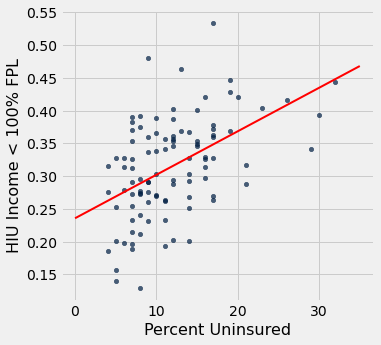

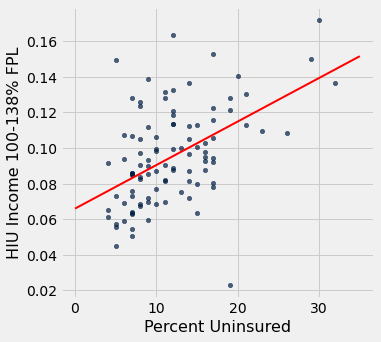

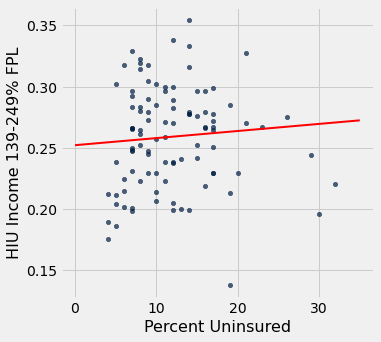

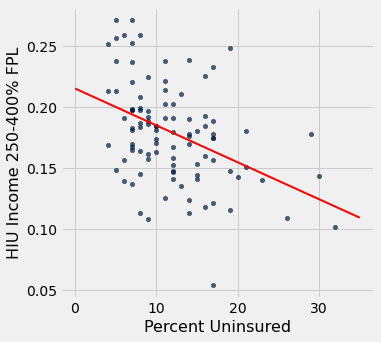

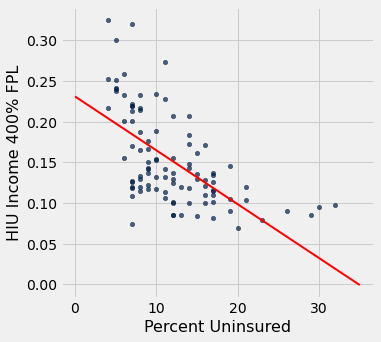

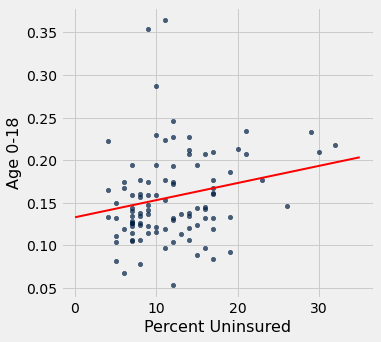

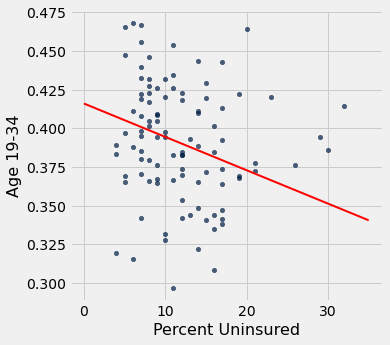

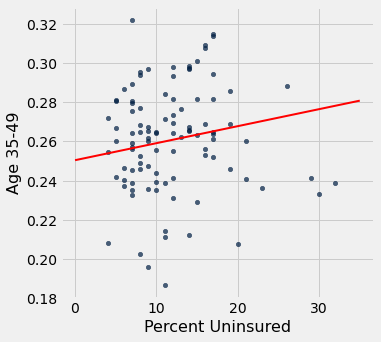

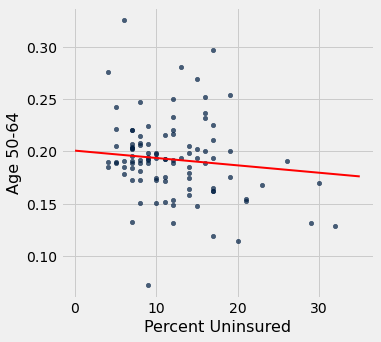

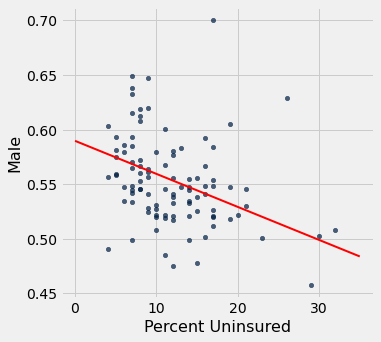

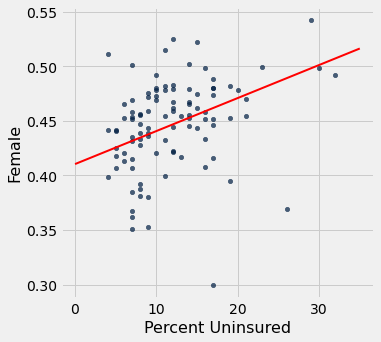

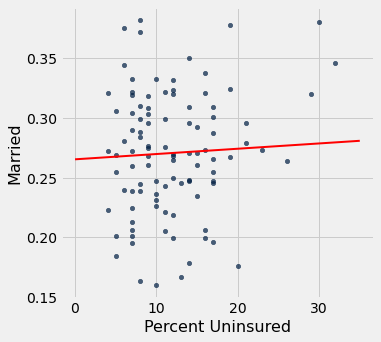

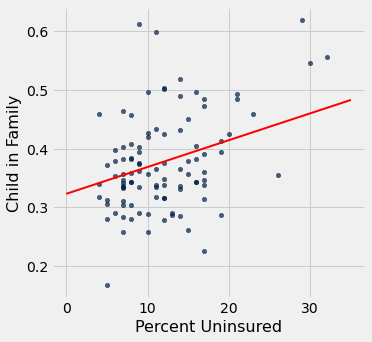

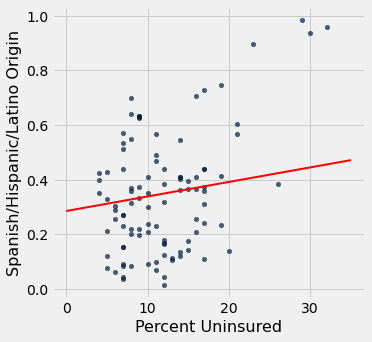

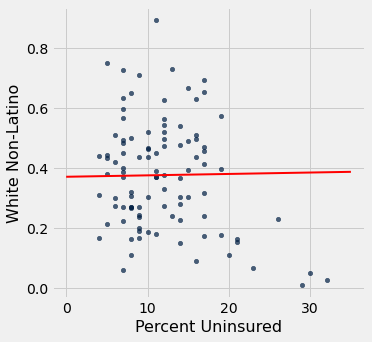

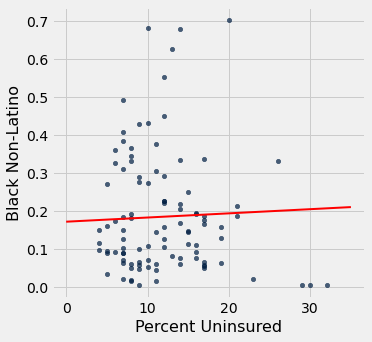

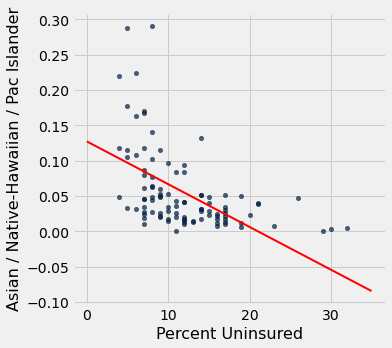

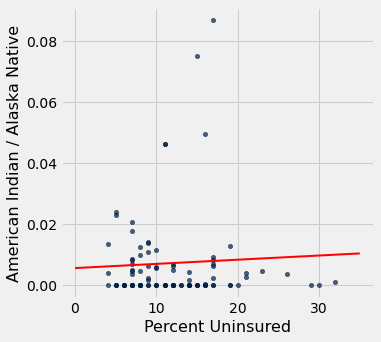

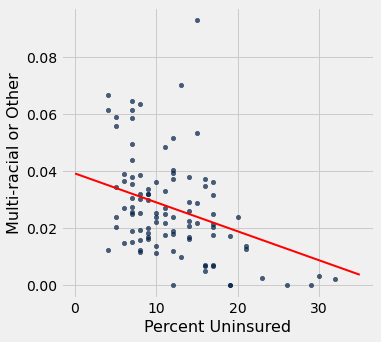

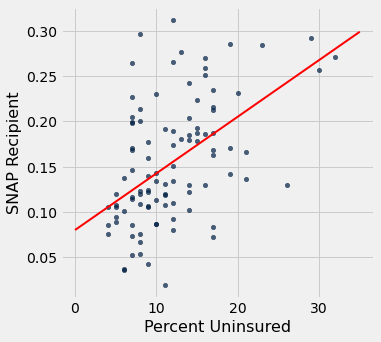

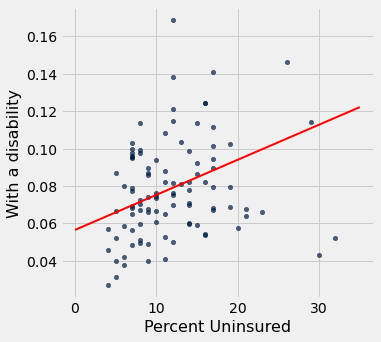

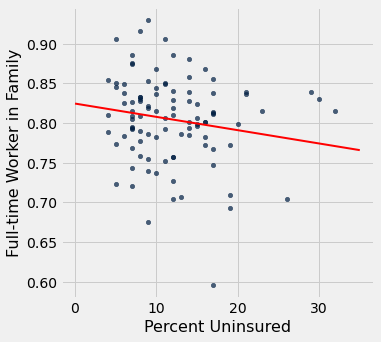

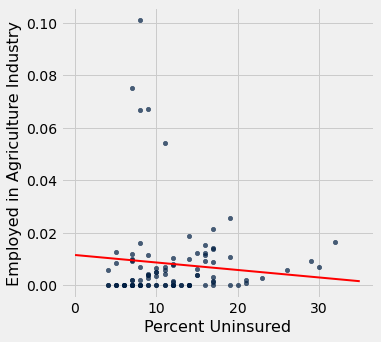

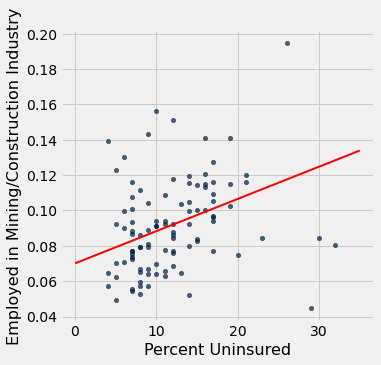

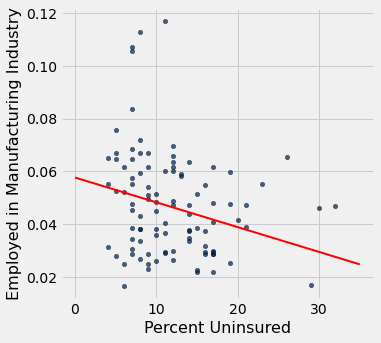

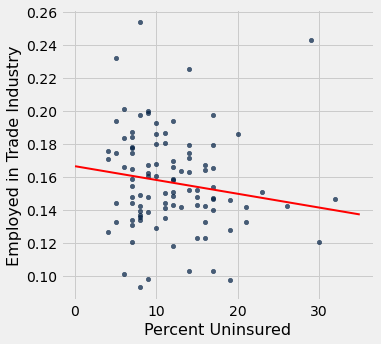

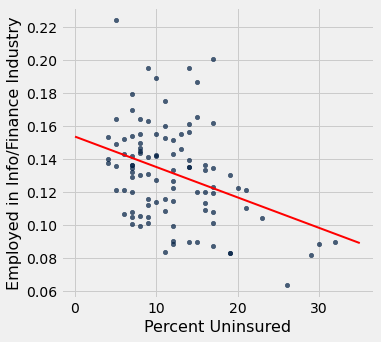

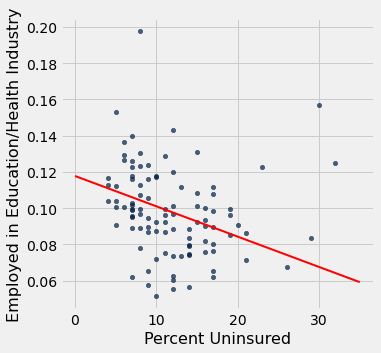

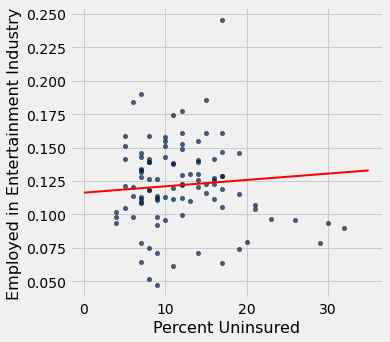

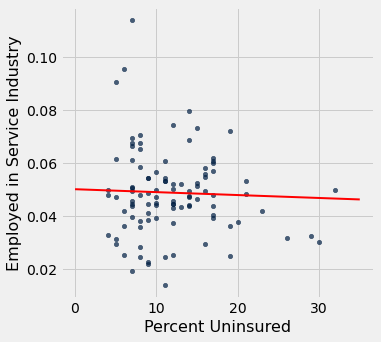

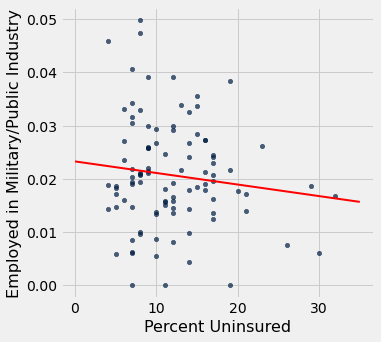

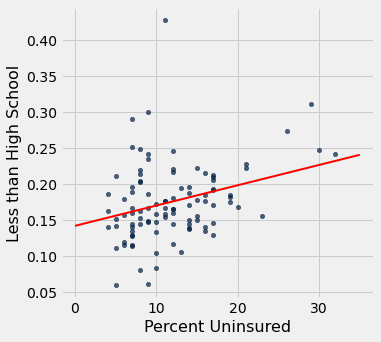

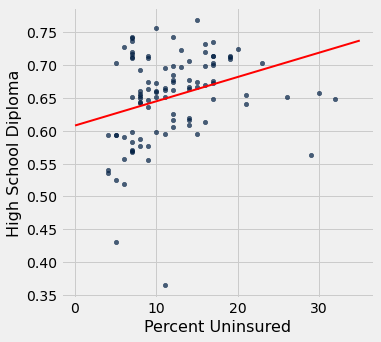

In [13]:
for col in column_names:
    if (col == "State Name") or (col == "County Name") or (col == "Total Non-Elderly Population (Excluding Undocumented)") or (col == "Uninsured Population (Excluding Undocumented)" or (col == "Percent Uninsured")):
        continue
    
    # highest_total_in_percent = highest_total_in_percent.with_column(
    #     "Predicted " + col, predict(col)
    # )
    
    #highest_total_in_percent.scatter("Percent Uninsured", [col, "Predicted " + col])
    y0 = factors.where("Factor", col).column("y at 0").item(0)
    y35 = factors.where("Factor", col).column("y at 35").item(0)
    
    highest_total_in_percent.scatter("Percent Uninsured", col)
    plots.plot([0, 35], [y0, y35], color='red', lw=2); 

In [14]:
factors

Factor,Inclination,y at 0,y at 35
HIU Income < 100% FPL,0.0066333,0.235678,0.467843
HIU Income 100-138% FPL,0.00244416,0.0659535,0.151499
HIU Income 139-249% FPL,0.000578933,0.252217,0.272479
HIU Income 250-400% FPL,-0.00302274,0.214945,0.109149
HIU Income 400% FPL,-0.00662667,0.231002,-0.000931842
Age 0-18,0.00201476,0.132804,0.20332
Age 19-34,-0.00215655,0.415975,0.340495
Age 35-49,0.000867957,0.250429,0.280808
Age 50-64,-0.000704792,0.200623,0.175955
Male,-0.00302763,0.589674,0.483707


In [15]:
difference_sum = make_array()

for factor_label in factors.column("Factor"):
    factor_row = factors.where("Factor", factor_label)
    expected_value = factor_row.column("Inclination").item(0) * highest_total_in_percent.column("Percent Uninsured") + factor_row.column("y at 0").item(0)
    actual_value = highest_total_in_percent.column(factor_label)
    difference = abs(expected_value - actual_value)
    difference_sum = np.append(difference_sum, sum(difference))
factors = factors.with_column(
    "difference sum", 1/difference_sum
)
factors

Factor,Inclination,y at 0,y at 35,difference sum
HIU Income < 100% FPL,0.0066333,0.235678,0.467843,0.188182
HIU Income 100-138% FPL,0.00244416,0.0659535,0.151499,0.540331
HIU Income 139-249% FPL,0.000578933,0.252217,0.272479,0.296888
HIU Income 250-400% FPL,-0.00302274,0.214945,0.109149,0.346144
HIU Income 400% FPL,-0.00662667,0.231002,-0.000931842,0.266016
Age 0-18,0.00201476,0.132804,0.20332,0.264042
Age 19-34,-0.00215655,0.415975,0.340495,0.322077
Age 35-49,0.000867957,0.250429,0.280808,0.467672
Age 50-64,-0.000704792,0.200623,0.175955,0.384484
Male,-0.00302763,0.589674,0.483707,0.345661


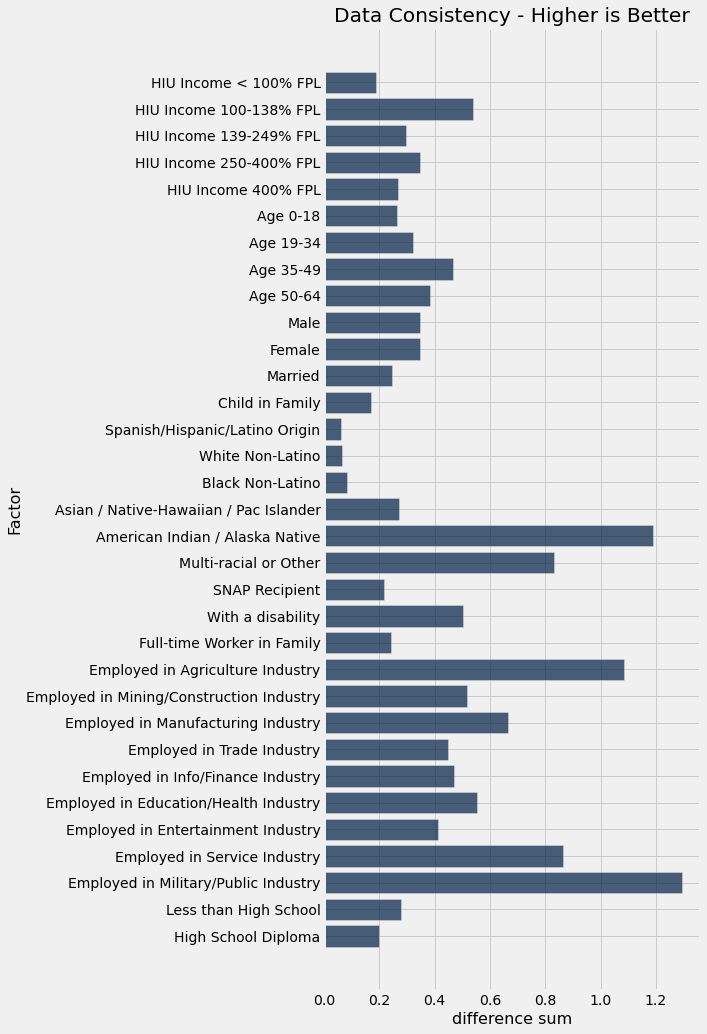

In [16]:
factors.barh("Factor", "difference sum")
plots.title("Data Consistency - Higher is Better");

In [17]:
# get the inclination > 0
inclination_over_0_factors = factors.where("Inclination", are.above(0))
inclination_over_0_factors

Factor,Inclination,y at 0,y at 35,difference sum
HIU Income < 100% FPL,0.0066333,0.235678,0.467843,0.188182
HIU Income 100-138% FPL,0.00244416,0.0659535,0.151499,0.540331
HIU Income 139-249% FPL,0.000578933,0.252217,0.272479,0.296888
Age 0-18,0.00201476,0.132804,0.20332,0.264042
Age 35-49,0.000867957,0.250429,0.280808,0.467672
Female,0.00302636,0.410411,0.516333,0.345176
Married,0.000442011,0.265297,0.280768,0.245447
Child in Family,0.00455425,0.323072,0.482471,0.169832
Spanish/Hispanic/Latino Origin,0.00532433,0.284949,0.4713,0.0608417
White Non-Latino,0.000469905,0.369746,0.386193,0.0664566


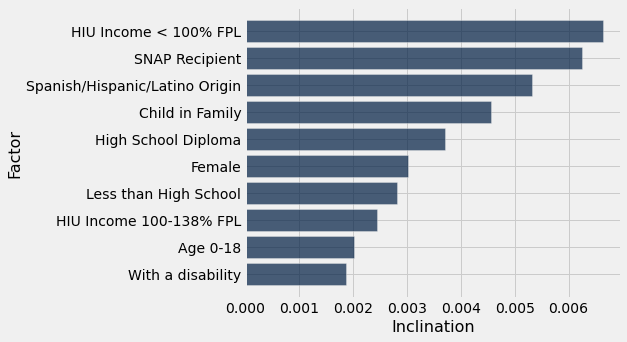

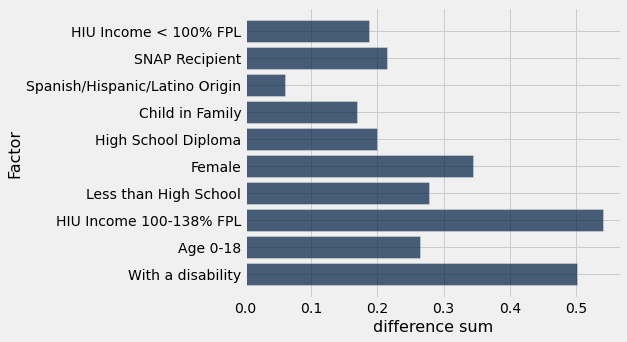

In [18]:
top_10_high_correlation_factors = inclination_over_0_factors.sort("Inclination", descending = True).take(np.arange(10))
top_10_high_correlation_factors.barh("Factor", "Inclination")
top_10_high_correlation_factors.barh("Factor", "difference sum")

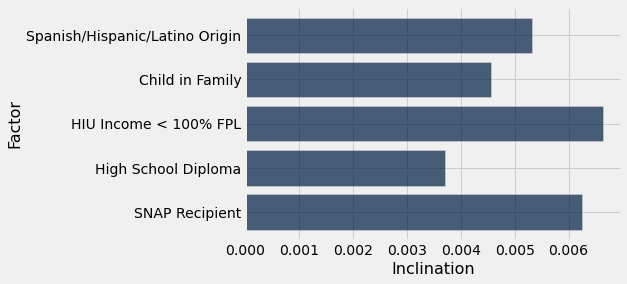

In [20]:
top_5_consistent_correlation_factors = top_10_high_correlation_factors.sort("difference sum", descending = False).take(np.arange(5))
top_5_consistent_correlation_factors.barh("Factor", "Inclination")

# First Observation
The percentage of uninsured population is proportional to these factors with high credibility:
1. Proportion of HIU Income 100-138% FPL
2. Proportion of Population with a disability
3. Proportion of Female
4. Proportion of Poplation whose degree is less than high school
5. Proportion of Age between 0-18

In [21]:
def getGraphInfo2(col1, col2):
    top_x_mean = highest_total_in_percent.sort(col1, descending = True).take(np.arange(sample_num)).column(col1).mean()
    low_x_mean = highest_total_in_percent.sort(col1, descending = False).take(np.arange(sample_num)).column(col1).mean()
    
    top_y_mean = highest_total_in_percent.sort(col1, descending = True).take(np.arange(sample_num)).column(col2).mean()
    low_y_mean = highest_total_in_percent.sort(col1, descending = False).take(np.arange(sample_num)).column(col2).mean()
    
    lean = (top_y_mean - low_y_mean) / (top_x_mean - low_x_mean)
    
    y0 = top_y_mean - lean * top_x_mean
    x_min = highest_total_in_percent.sort(col1, descending = False).take(0).column(col1).mean()
    y_min = lean * x_min + y0
    x_max = highest_total_in_percent.sort(col1, descending = True).take(0).column(col1).mean()
    y_max = lean * x_max + y0
    return [lean, x_min, y_min, x_max, y_max]

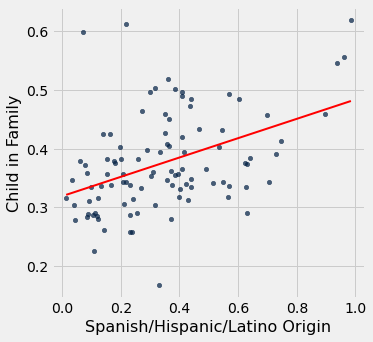

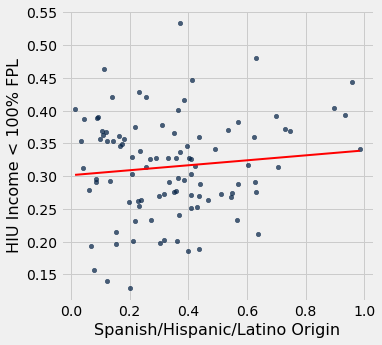

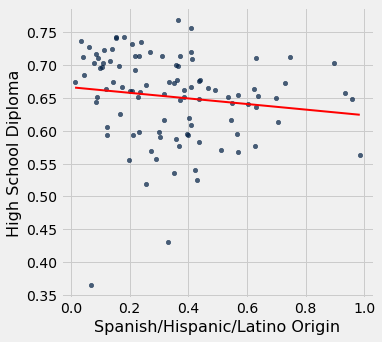

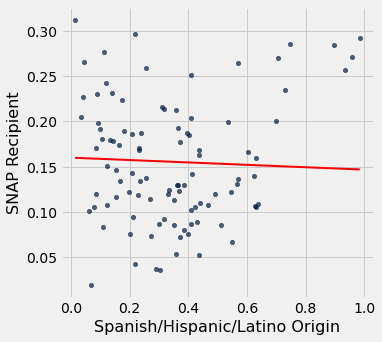

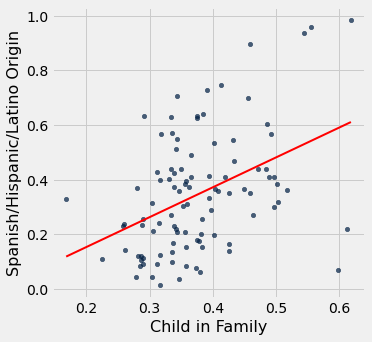

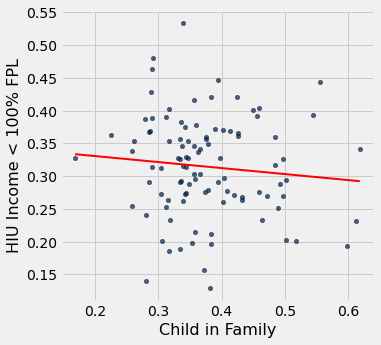

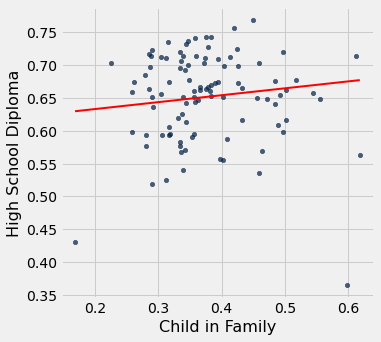

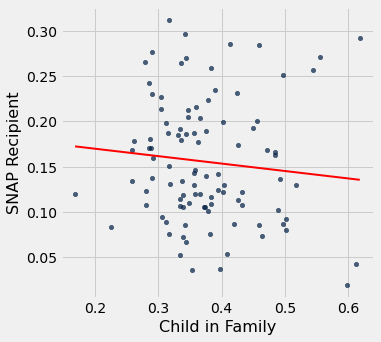

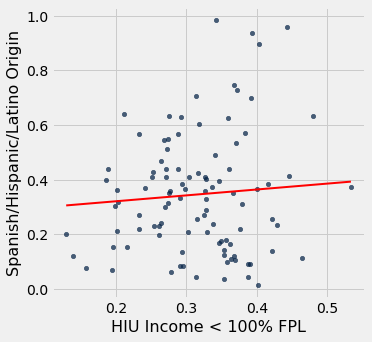

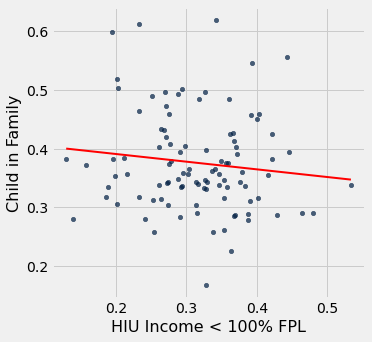

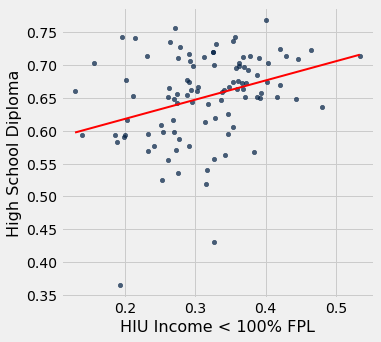

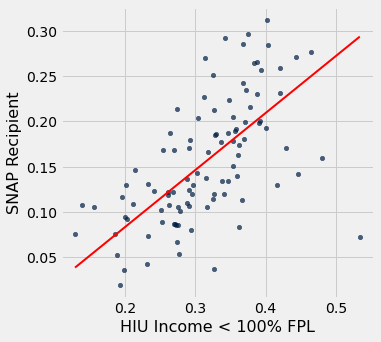

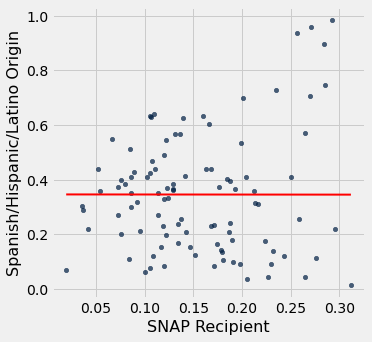

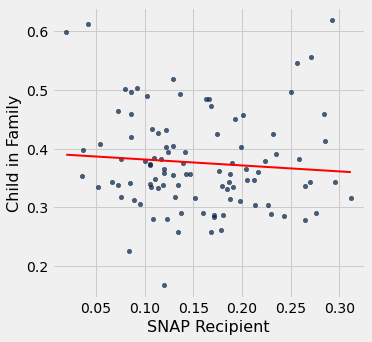

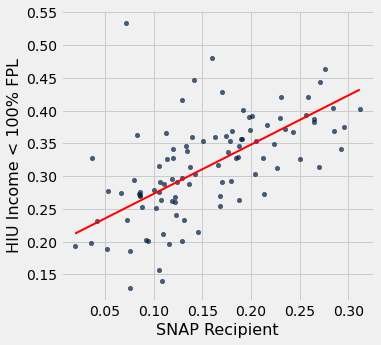

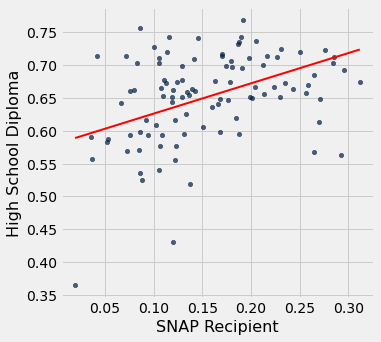

In [22]:
for factor in top_5_consistent_correlation_factors.column("Factor"):
    for factor2 in top_5_consistent_correlation_factors.column("Factor"):
        if "High" in factor or "Age" in factor:
            break
        if factor == factor2:
            continue
        infos2 = getGraphInfo2(factor, factor2)
        highest_total_in_percent.scatter(factor, factor2)
        plots.plot([infos2[1], infos2[3]], [infos2[2], infos2[4]], color="red", lw="2")

# Second Observation
We can find some proportional correlation between the selected factors:
1. Larger HIU Income 100-138% FPL, Larger proportion of population with disability
2. Larger HIU Income 100-138% FPL, Larger proportion of female population

# Conclusion Based on Two Observations

### <1> Proportional correlation between uninsured percent
1. Proportion of HIU Income 100-138% FPL
2. Proportion of Population with a disability
3. Proportion of Female
4. Proportion of Poplation whose degree is less than high school
5. Proportion of Age between 0-18

### <2> Proportion correlation between those five factors
1. HIU Income 100-138% FPL and With Disability
2. HIU Income 100-138% FPL and Female

### <3> Conclusion
1. Female with Disability whose income is 100-138% FPL have more possibility of having no insurance.
2. People who haven't graduated from high school have more possibility of having no insurance.
3. People who are age between 0-18 years old have more possibility of having no insurance.